In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.probability import FreqDist
import string

# Download necessary NLTK resources (only required once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
import io

train_df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


#Some example tweets

In [ ]:
print('Two disaster tweet examples:\n')
print(train_df[train_df['target']==1]['text'].iloc[1])
print(train_df[train_df['target']==1]['text'].iloc[1208])
print('\nTwo nondisaster tweet examples:\n')
print(train_df[train_df['target']==0]['text'].iloc[1])
print(train_df[train_df['target']==0]['text'].iloc[309])

Two disaster tweet examples:

Forest fire near La Ronge Sask. Canada
'There was a small earthquake in LA but don't worry Emily Rossum is fine' #difficultpeople is great

Two nondisaster tweet examples:

I love fruits
1-6 TIX Calgary Flames vs COL Avalanche Preseason 9/29 Scotiabank Saddledome http://t.co/5G8qA6mPxm


In [5]:
print(len(train_df[train_df['target']==1]))
print(len(train_df[train_df['target']==0]))

3271
4342


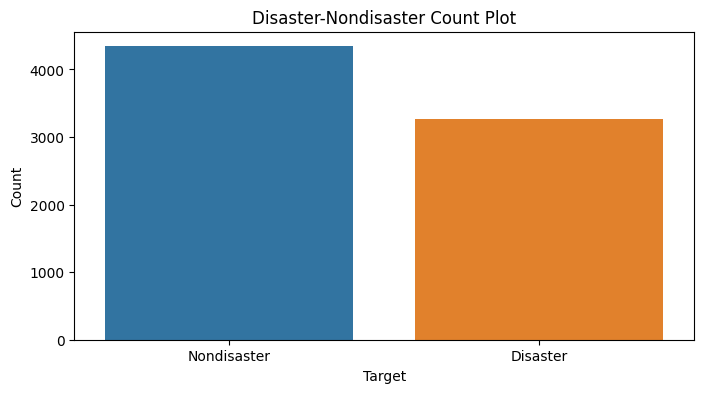

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))

all_plot = sns.countplot(x=train_df['target'], ax=ax)
#plt.xticks(rotation=90)
ax.set_xlabel('Target')
ax.set_ylabel('Count')
ax.set_xticklabels(['Nondisaster', 'Disaster'])
ax.set_title('Disaster-Nondisaster Count Plot')
fig.savefig('disaster_countplot.png', dpi=200, bbox_inches='tight');


#from google.colab import files
#files.download("disaster_countplot.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

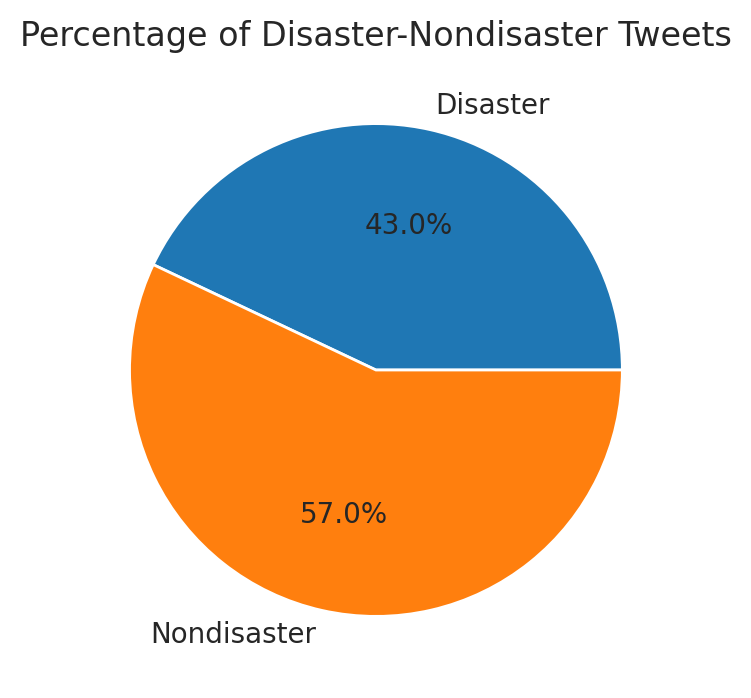

In [ ]:
dis_count = len(train_df[train_df['target']==1])
nondis_count = len(train_df[train_df['target']==0])
sns.set_style("whitegrid")
plt.figure(figsize=(4,4), dpi=200)
plt.pie([dis_count,nondis_count],labels=['Disaster', 'Nondisaster'], autopct='%1.1f%%')
plt.title('Percentage of Disaster-Nondisaster Tweets')

plt.savefig('disaster_piechart.png', dpi=200, bbox_inches='tight')


from google.colab import files
files.download("disaster_piechart.png")

#Remove links and fix '&'

In [ ]:
X = train_df['text']
y = train_df['target']

In [ ]:
for i in range(len(X)):
  X[i] = re.sub('&amp', '&', X[i]) #turns &amp to &
  X[i] = re.sub(r'http\S+', '', X[i]) #removes links

<ipython-input-19-5a25987042dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = re.sub('&amp', '&', X[i])
<ipython-input-19-5a25987042dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = re.sub(r'http\S+', '', X[i])


In [ ]:
print('Two disaster tweet examples:\n')
print(train_df[train_df['target']==1]['text'].iloc[1])
print(train_df[train_df['target']==1]['text'].iloc[1208])
print('\nTwo nondisaster tweet examples:\n')
print(train_df[train_df['target']==0]['text'].iloc[1])
print(train_df[train_df['target']==0]['text'].iloc[309])

Two disaster tweet examples:

Forest fire near La Ronge Sask. Canada
'There was a small earthquake in LA but don't worry Emily Rossum is fine' #difficultpeople is great

Two nondisaster tweet examples:

I love fruits
1-6 TIX Calgary Flames vs COL Avalanche Preseason 9/29 Scotiabank Saddledome 


#NLTK text processing example on one tweet after links are removed and '&' are fixed

Reference: https://pieriantraining.com/guide-to-nltk-natural-language-toolkit-for-python/

In [ ]:
text = X[120]
tokens = word_tokenize(text.lower())
print('Original text:')
print(text)
print("Word Tokens:")
print(tokens)
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.casefold() not in stop_words]
print("Tokens after removing stop words:")
print(filtered_tokens)
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
print("Lemmatized Tokens:")
print(lemmatized_tokens)
special_chars = set(string.punctuation)
filtered_tokens = [token for token in lemmatized_tokens if token not in special_chars]
print("Tokens after handling special characters:")
print(filtered_tokens)

Original text:
#WisdomWed BONUS - 5 Minute Daily Habits that could really improve your life. How many do you already do? #lifehacks 
Word Tokens:
['#', 'wisdomwed', 'bonus', '-', '5', 'minute', 'daily', 'habits', 'that', 'could', 'really', 'improve', 'your', 'life', '.', 'how', 'many', 'do', 'you', 'already', 'do', '?', '#', 'lifehacks']
Tokens after removing stop words:
['#', 'wisdomwed', 'bonus', '-', '5', 'minute', 'daily', 'habits', 'could', 'really', 'improve', 'life', '.', 'many', 'already', '?', '#', 'lifehacks']
Lemmatized Tokens:
['#', 'wisdomwed', 'bonus', '-', '5', 'minute', 'daily', 'habit', 'could', 'really', 'improve', 'life', '.', 'many', 'already', '?', '#', 'lifehacks']
Tokens after handling special characters:
['wisdomwed', 'bonus', '5', 'minute', 'daily', 'habit', 'could', 'really', 'improve', 'life', 'many', 'already', 'lifehacks']


In [ ]:
preprocessed_tweet = ' '.join(filtered_tokens)
preprocessed_tweet

'wisdomwed bonus 5 minute daily habit could really improve life many already lifehacks'

# Disaster Tweets Word Frequency

Reference: https://dariuslfuller.medium.com/creating-visuals-with-nltks-freqdist-ac4e667e49f3

In [ ]:
word_list = []
for tweet in train_df[train_df['target']==1]['text']:
  tokens = word_tokenize(tweet.lower())
  stop_words.update(['via', '...', '..', "'s","'m", "'re"])
  filtered_tokens = [token for token in tokens if token.casefold() not in stop_words]
  special_chars = set(string.punctuation)
  filtered_tokens = [token for token in filtered_tokens if token not in special_chars]
  word_list.extend(filtered_tokens)

In [ ]:
fq = FreqDist(token.lower() for token in word_list)
fq

FreqDist({'fire': 177, 'news': 140, "n't": 120, 'disaster': 119, 'california': 111, 'police': 107, 'people': 104, 'suicide': 104, 'killed': 93, 'like': 93, ...})

In [ ]:
fq.most_common(30)

[('fire', 177),
 ('news', 140),
 ("n't", 120),
 ('disaster', 119),
 ('california', 111),
 ('police', 107),
 ('people', 104),
 ('suicide', 104),
 ('killed', 93),
 ('like', 93),
 ('storm', 87),
 ('hiroshima', 87),
 ('crash', 85),
 ('fires', 84),
 ('families', 81),
 ('train', 79),
 ('2', 76),
 ('buildings', 75),
 ('emergency', 74),
 ('bomb', 74),
 ('two', 72),
 ('mh370', 71),
 ('nuclear', 70),
 ('attack', 69),
 ('video', 69),
 ('wildfire', 69),
 ('accident', 68),
 ('get', 66),
 ('bombing', 66),
 ('one', 65)]

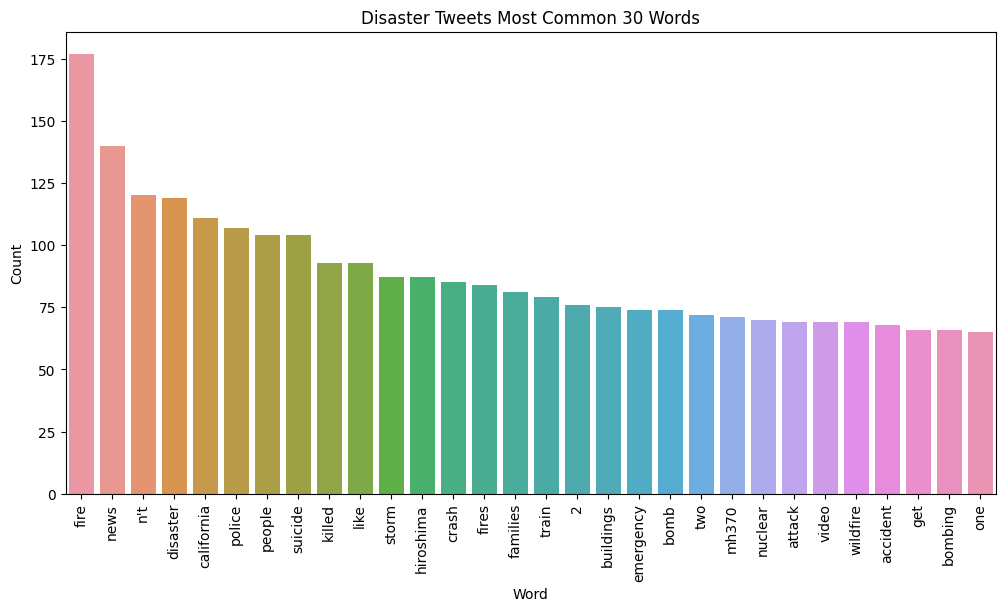

In [ ]:
all_fdist = fq.most_common(30)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(12,6))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=90)
ax.set_xlabel('Word')
ax.set_ylabel('Count')
ax.set_title('Disaster Tweets Most Common 30 Words')
fig.savefig('disaster_common_words.png', dpi=200, bbox_inches='tight');

#from google.colab import files
#files.download("disaster_common_words.png")

# Non-disaster Tweets Word Frequency

Reference: https://dariuslfuller.medium.com/creating-visuals-with-nltks-freqdist-ac4e667e49f3

In [ ]:
word_list = []
for tweet in train_df[train_df['target']==0]['text']:
  tokens = word_tokenize(tweet.lower())
  stop_words = set(stopwords.words('english'))
  stop_words.update(['via', '...', '..', "'s","'m", "'re"])
  filtered_tokens = [token for token in tokens if token.casefold() not in stop_words]
  special_chars = set(string.punctuation)
  filtered_tokens = [token for token in filtered_tokens if token not in special_chars]
  word_list.extend(filtered_tokens)

In [ ]:
fq = FreqDist(token.lower() for token in word_list)
fq

FreqDist({"n't": 326, 'like': 253, 'new': 168, 'get': 162, 'one': 129, 'body': 111, 'would': 105, 'video': 96, 'people': 93, 'got': 92, ...})

In [ ]:
fq.most_common(30)

[("n't", 326),
 ('like', 253),
 ('new', 168),
 ('get', 162),
 ('one', 129),
 ('body', 111),
 ('would', 105),
 ('video', 96),
 ('people', 93),
 ('got', 92),
 ('love', 89),
 ('know', 85),
 ('back', 84),
 ('2', 84),
 ('time', 83),
 ('see', 82),
 ('emergency', 81),
 ('full', 81),
 ('day', 78),
 ('youtube', 76),
 ('us', 75),
 ('going', 75),
 ('ca', 74),
 ('fire', 72),
 ('still', 71),
 ('gt', 70),
 ('let', 69),
 ('3', 67),
 ('good', 67),
 ('go', 66)]

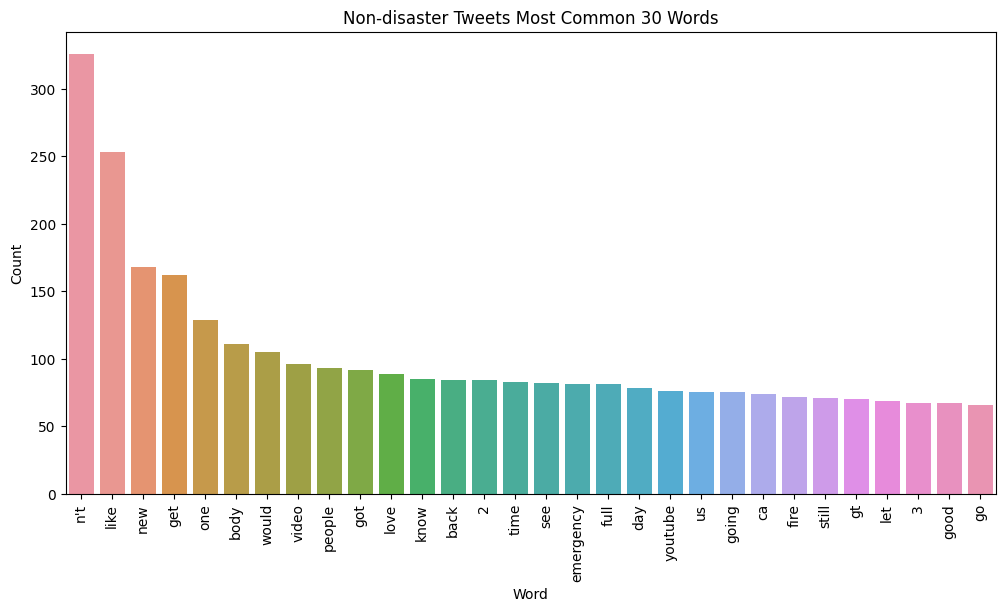

In [ ]:
all_fdist = fq.most_common(30)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(12,6))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=90)
ax.set_xlabel('Word')
ax.set_ylabel('Count')
ax.set_title('Non-disaster Tweets Most Common 30 Words')
fig.savefig('non_disaster_common_words.png', dpi=200, bbox_inches='tight');

#files.download("non_disaster_common_words.png")

# Commonly Used Words in General

Reference: https://dariuslfuller.medium.com/creating-visuals-with-nltks-freqdist-ac4e667e49f3

In [ ]:
word_list = []
for tweet in train_df['text']:
  tokens = word_tokenize(tweet.lower())
  stop_words = set(stopwords.words('english'))
  stop_words.update(['via', '...', '..', "'s","'m", "'re"])
  filtered_tokens = [token for token in tokens if token.casefold() not in stop_words]
  special_chars = set(string.punctuation)
  filtered_tokens = [token for token in filtered_tokens if token not in special_chars]
  word_list.extend(filtered_tokens)

In [ ]:
fq = FreqDist(token.lower() for token in word_list)
fq

FreqDist({"n't": 446, 'like': 346, 'fire': 249, 'get': 228, 'new': 223, 'people': 197, 'news': 197, 'one': 194, 'video': 165, '2': 160, ...})

In [ ]:
fq.most_common(30)

[("n't", 446),
 ('like', 346),
 ('fire', 249),
 ('get', 228),
 ('new', 223),
 ('people', 197),
 ('news', 197),
 ('one', 194),
 ('video', 165),
 ('2', 160),
 ('emergency', 155),
 ('disaster', 154),
 ('would', 142),
 ('police', 140),
 ('still', 128),
 ('got', 124),
 ('body', 124),
 ('us', 122),
 ('burning', 120),
 ('back', 119),
 ('storm', 119),
 ('california', 117),
 ('crash', 117),
 ('time', 112),
 ('know', 112),
 ('man', 110),
 ('suicide', 110),
 ('buildings', 110),
 ('day', 109),
 ('rt', 107)]

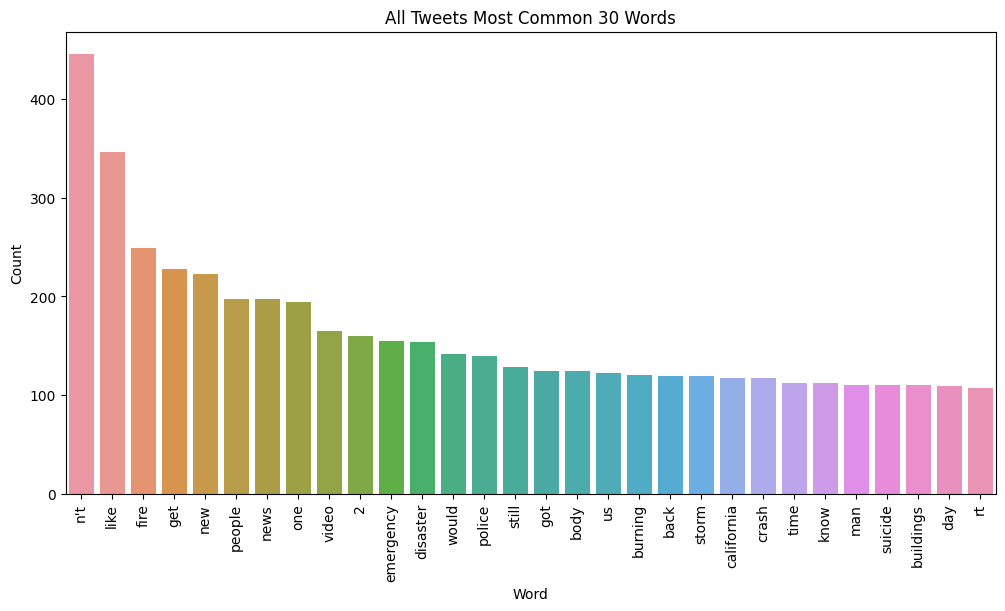

In [ ]:
all_fdist = fq.most_common(30)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(12,6))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=90)
ax.set_xlabel('Word')
ax.set_ylabel('Count')
ax.set_title('All Tweets Most Common 30 Words')
fig.savefig('all_tweets_common_words.png', dpi=200, bbox_inches='tight');

#files.download("all_tweets_common_words.png")

#Location Plots

In [ ]:
train_df[train_df['target']==1]['location'].value_counts()[:10]

USA               67
United States     27
Nigeria           22
India             20
Mumbai            19
UK                16
London            16
New York          16
Washington, DC    15
Canada            13
Name: location, dtype: int64

In [ ]:
train_df[train_df['target']==0]['location'].value_counts()[:10]

New York           55
USA                37
London             29
United States      23
Los Angeles, CA    18
Canada             16
Kenya              15
Everywhere         12
Florida            11
UK                 11
Name: location, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

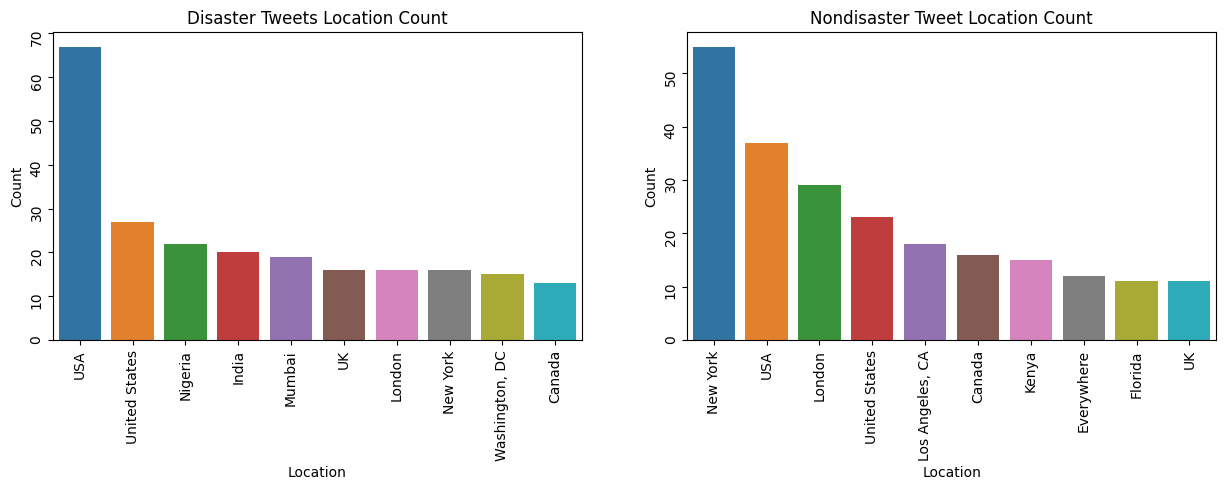

In [ ]:
nondis = train_df[train_df['target']==0]['location'].value_counts()[:10]
dis = train_df[train_df['target']==1]['location'].value_counts()[:10]

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,4))


dis_plot = sns.barplot(x=dis.index, y=dis.values, ax=ax1)
nondis_plot = sns.barplot(x=nondis.index, y=nondis.values, ax=ax2)
ax1.tick_params(labelrotation=90)
ax2.tick_params(labelrotation=90)
ax1.set_xlabel('Location')
ax2.set_xlabel('Location')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')
ax1.set_title('Disaster Tweets Location Count')
ax2.set_title('Nondisaster Tweet Location Count')
fig.savefig('location_counts.png', dpi=200, bbox_inches='tight');

#files.download("location_counts.png")